In [1]:
from sklearn.datasets import load_iris

data = load_iris(as_frame=True).frame

data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [2]:
import matplotlib.pyplot as plt
%matplotlib notebook

In [3]:
x = data['petal length (cm)']
y = data['petal width (cm)']

<IPython.core.display.Javascript object>


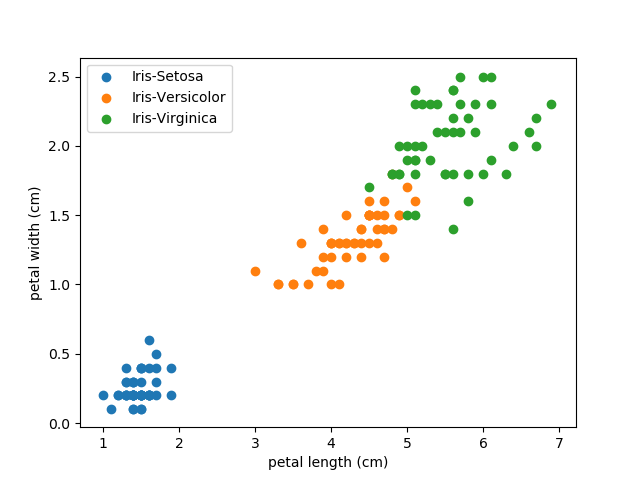

In [4]:

# create a new figure
plt.figure()

# these two columns will be our x and y values
x = data['petal length (cm)']
y = data['petal width (cm)']

# scatter in 50s...
plt.scatter(x.iloc[:50], y.iloc[:50], label='Iris-Setosa')
plt.scatter(x.iloc[50:100], y.iloc[50:100], label='Iris-Versicolor')
plt.scatter(x.iloc[100:], y.iloc[100:], label='Iris-Virginica')

plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.legend()

In [8]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(data, test_size=0.2, random_state=37)

In [13]:
train_data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
3,4.6,3.1,1.5,0.2,0
146,6.3,2.5,5.0,1.9,2
79,5.7,2.6,3.5,1.0,1
40,5.0,3.5,1.3,0.3,0
136,6.3,3.4,5.6,2.4,2
...,...,...,...,...,...
122,7.7,2.8,6.7,2.0,2
22,4.6,3.6,1.0,0.2,0
76,6.8,2.8,4.8,1.4,1
107,7.3,2.9,6.3,1.8,2


In [14]:
input_cols = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [16]:
train_data[input_cols]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
3,4.6,3.1,1.5,0.2
146,6.3,2.5,5.0,1.9
79,5.7,2.6,3.5,1.0
40,5.0,3.5,1.3,0.3
136,6.3,3.4,5.6,2.4
...,...,...,...,...
122,7.7,2.8,6.7,2.0
22,4.6,3.6,1.0,0.2
76,6.8,2.8,4.8,1.4
107,7.3,2.9,6.3,1.8


In [17]:
target_col = 'target'

In [19]:
train_data[target_col]

3      0
146    2
79     1
40     0
136    2
      ..
122    2
22     0
76     1
107    2
143    2
Name: target, Length: 120, dtype: int64

In [20]:
from sklearn.neighbors import KNeighborsClassifier

# generate a new classifier: KNN with k=5
my_classifier = KNeighborsClassifier(n_neighbors=5)

# these are the columns that we will use to predict
input_cols = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

# this is the column we are trying to predict
target_col = 'target'

# fit the classifier using the input data and targets
my_classifier.fit(train_data[input_cols], train_data[target_col])

KNeighborsClassifier()

In [32]:
# use the .predict() function on the test data
prediction = my_classifier.predict(test_data[input_cols])

prediction

array([1, 0, 2, 2, 0, 1, 0, 2, 2, 2, 0, 2, 2, 0, 0, 2, 1, 2, 2, 2, 1, 0,
       2, 2, 0, 1, 2, 1, 0, 1])

In [25]:
# get the true labels from the test data
true_label = test_data[target_col].values
true_label

array([1, 0, 2, 2, 0, 1, 0, 2, 2, 2, 0, 2, 2, 0, 0, 2, 1, 2, 2, 2, 1, 0,
       2, 1, 0, 1, 2, 1, 0, 1])

In [29]:
sum([True, True, True, False])

3

In [26]:
prediction == true_label

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True])

In [10]:
sum(prediction == true_label)

29


In [11]:
print(sum(prediction == true_label) / 30)

0.9666666666666667


In [35]:
for k in [1, 2, 3, 4, 5, 6, 7, 8, 9]:
    
    my_classifier = KNeighborsClassifier(n_neighbors=k)
    
    my_classifier.fit(train_data[input_cols], train_data[target_col])
    
    prediction = my_classifier.predict(test_data[input_cols])
    
    print(k, sum(prediction == test_data[target_col]))



1 29
2 28
3 29
4 28
5 29
6 28
7 28
8 28
9 28


In [13]:
# perform a for-loop over different k-values
for k in [1, 2, 3, 4, 5, 6, 7, 8, 9]:
    
    # create a new classifier with k neighbours
    my_classifier = KNeighborsClassifier(n_neighbors=k)
    
    # fit this classifier on the training data
    my_classifier.fit(train_data[input_cols], train_data[target_col])
    
    # make a prediction on the test data
    prediction = my_classifier.predict(test_data[input_cols])
    
    # analyse the accuracy
    print(k, sum(prediction == true_label))

1 29
2 28
3 29
4 28
5 29
6 28
7 28
8 28
9 28
